In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

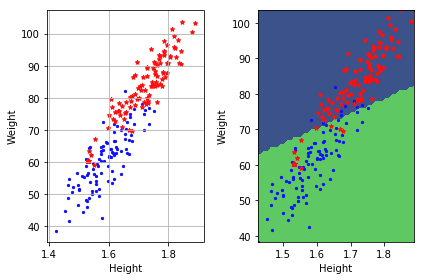

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = least_squares(y, tx)


    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

In [4]:
def sigmoid(t):
    """apply sigmoid function on t."""
    et = np.exp(t)
    return et / (1 + et)
    

In [5]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    #return np.sum(np.log(1 + np.exp(tx @ w))  - (y.T @ (tx @ w)))
    pred = sigmoid(tx.dot(w))
    loss = y.T.dot(np.log(pred)) + (1 - y).T.dot(np.log(1 - pred))
    return np.squeeze(- loss)

In [9]:
def calculate_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    print(tx.shape)
    print(y.shape)
    return tx.T @ (sigmoid(tx @ w) - y)


### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [10]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    grad = calculate_gradient(y, tx, w)
       
    loss = calculate_loss(y, tx, w)

    w = w - gamma * grad
    return loss, w

Demo!

(200, 3)
(200, 1)
Current iteration=0, loss=138.62943611198904
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(200, 3)
(200, 1)
(

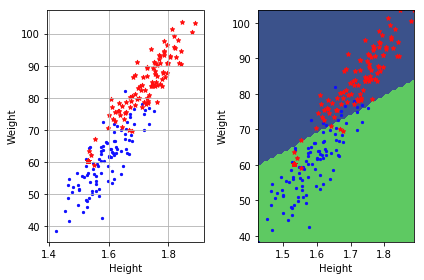

In [11]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your hessian below

In [ ]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    raise NotImplementedError

Write a function below to return loss, gradient, and hessian.

In [ ]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    raise NotImplementedError

### Using Newton's method
Use Newton's method for logistic regression.

In [ ]:
def learning_by_newton_method(y, tx, w):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

demo

In [ ]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression
Fill in the function below.

In [ ]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    raise NotImplementedError

In [ ]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    raise NotImplementedError
    return loss, w

In [ ]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)